In [1]:
import os 
import pandas as pd
users = os.listdir("users")

def path(user) : 
    return "users/"+user

def remove_items(test_list, item = "**SOF**"):
 
    # using list comprehension to perform the task
    res = [i for i in test_list if i != item]
 
    return res



def read_file(file_path) :
    file = open(file_path, 'r')
    Lines = file.readlines()
    command_sequence = []
    for line in Lines :
        command_sequence.append(line[:-1])
    
    return command_sequence
COMMAND_SEQUENCES = []
for user in users : 
    COMMAND_SEQUENCES.append(read_file(path(user)))

for i in range(len(COMMAND_SEQUENCES)) :
    COMMAND_SEQUENCES[i] = remove_items(COMMAND_SEQUENCES[i])
    

def map_to_ints(seq) : 

    all_commands = list(set(seq))
    dictionary = {}
    rev_dictionary = {}
    for index,command in enumerate(all_commands) :
        dictionary[command] = index
        rev_dictionary[index] = command

    mapped = pd.Series(seq).map(dictionary)
    return list(mapped),rev_dictionary

In [2]:
for user,i in enumerate(COMMAND_SEQUENCES) :
    i = pd.Series(i)
    print(f"user {user} , length is {len(i)}, number of unique commands is {i.nunique()}")
    

temp = []
for i in COMMAND_SEQUENCES : 
    temp = temp + i
temp = pd.Series(temp)
print(f"Total number of commands : {temp.nunique()}" )

user 0 , length is 8407, number of unique commands is 196
user 1 , length is 19366, number of unique commands is 287
user 2 , length is 17669, number of unique commands is 309
user 3 , length is 16365, number of unique commands is 272
user 4 , length is 36862, number of unique commands is 478
user 5 , length is 34239, number of unique commands is 562
user 6 , length is 60733, number of unique commands is 608
user 7 , length is 15807, number of unique commands is 448
user 8 , length is 52059, number of unique commands is 705
Total number of commands : 2358


In [3]:
temp.value_counts()[temp.value_counts() < 2]
#1170 commands used only once in all users ==> we can map it to a special "UNK" term for unknown

-100000                  1
elmn                     1
-99000                   1
<GENSYM:1>/pine2emacs    1
cmod                     1
                        ..
cd <GENSYM:28>/          1
#+0865869408             1
#+0865868457             1
rm tmp_co*.o             1
kll                      1
Length: 1170, dtype: int64

In [4]:
dic_mapper = {}
counts = temp.value_counts()
for command in counts.index :
    if counts[command] > 1 :
        dic_mapper[command] = command
    else :
        dic_mapper[command] = "<UNK>"

In [5]:
def transformer(List,dic_mapper) :
    return list(pd.Series(List).map(dic_mapper))

In [6]:
for user,i in enumerate(COMMAND_SEQUENCES) :
    COMMAND_SEQUENCES[user] = transformer(i,dic_mapper)

In [7]:
for user,i in enumerate(COMMAND_SEQUENCES) :
    i = pd.Series(i)
    print(f"user {user} , length is {len(i)}, number of unique commands is {i.nunique()}")
    

temp = []
for i in COMMAND_SEQUENCES : 
    temp = temp + i
temp = pd.Series(temp)
print(f"Total number of commands : {temp.nunique()}" )

user 0 , length is 8407, number of unique commands is 170
user 1 , length is 19366, number of unique commands is 221
user 2 , length is 17669, number of unique commands is 204
user 3 , length is 16365, number of unique commands is 189
user 4 , length is 36862, number of unique commands is 357
user 5 , length is 34239, number of unique commands is 309
user 6 , length is 60733, number of unique commands is 403
user 7 , length is 15807, number of unique commands is 334
user 8 , length is 52059, number of unique commands is 517
Total number of commands : 1189


8407


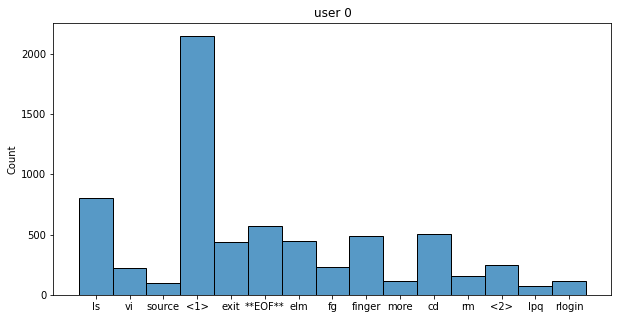

19366


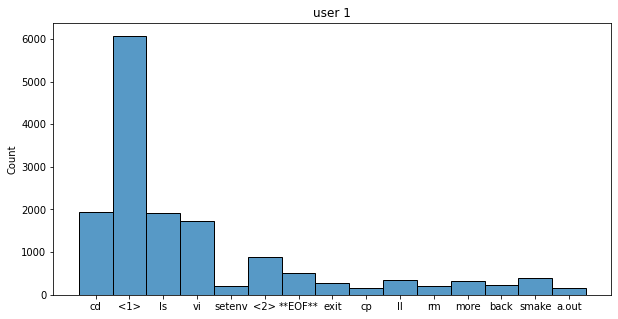

17669


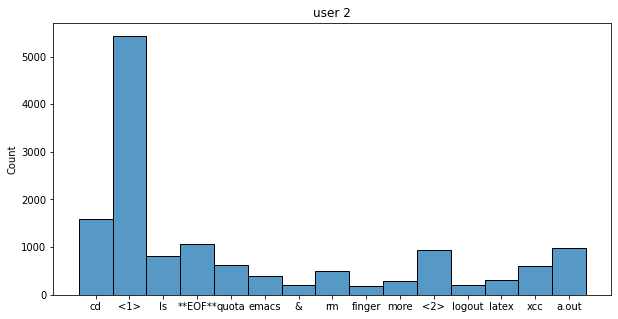

16365


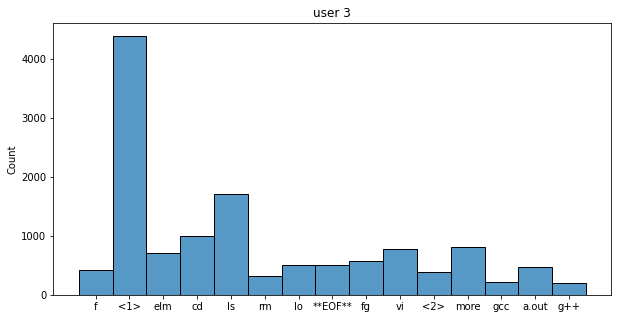

36862


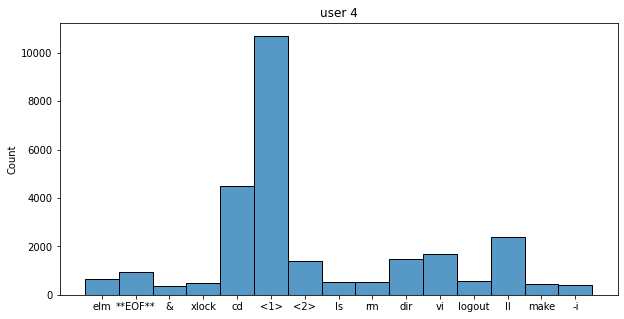

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
for user,i in enumerate(COMMAND_SEQUENCES) :
    i = pd.Series(i)
    print(len(i))
    selected = i.value_counts().iloc[:15].index
    i = i[i.isin(selected)]
    plt.figure(figsize=(10,5))
    plt.title(f"user {user}")
    sns.histplot(i)
    plt.show()
    if user == 4 :
        break

8407


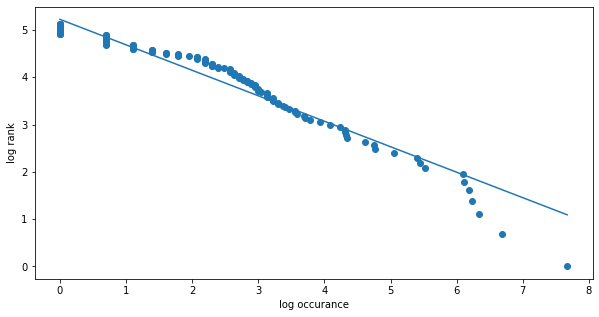

19366


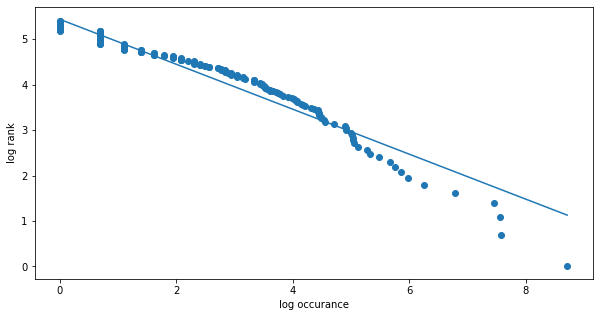

17669


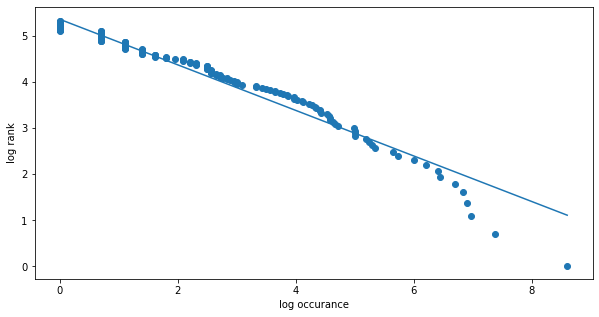

In [12]:
#Testing if we have a zipf law, I don't know how right is this 
#To be discussed
import numpy as np
for user,i in enumerate(COMMAND_SEQUENCES) :
    i = pd.Series(i)
    print(len(i))
    temp = i.value_counts().to_dict()
    count_dict = {}
    for rank,i in enumerate(temp.keys()):
        count_dict[rank + 1] = temp[i]
    ranks = np.array(list(count_dict.keys()))
    occurances = np.array(list(count_dict.values()))
    plt.figure(figsize = (10,5))
    plt.scatter(   np.log(occurances), np.log(ranks))
    from sklearn.linear_model import LinearRegression
    plt.xlabel("log occurance")
    plt.ylabel("log rank")
    model = LinearRegression().fit(np.log(occurances).reshape(-1,1),np.log(ranks))
    plt.plot(np.log(occurances),model.predict(np.log(occurances).reshape(-1,1)))
    plt.savefig("LogLog plot for the Linux Data.jpg")
    plt.show()
    if user == 2 :
        break

<Figure size 432x288 with 0 Axes>

In [13]:
map_to_ints(COMMAND_SEQUENCES[0])[1]

{0: 'thor',
 1: 'cancel',
 2: '-P',
 3: '%2',
 4: 'acroread',
 5: 'mkdir',
 6: 'date',
 7: 'whoami',
 8: '**EOF**',
 9: 'mv',
 10: 'emacs',
 11: '-dmsl23',
 12: 'ph',
 13: 'finer',
 14: '<UNK>',
 15: '<4>',
 16: '-Pmsl20',
 17: 'version',
 18: '>',
 19: 'gunzip',
 20: '-dmsl22',
 21: 'chown',
 22: '<GENSYM:0>/vi',
 23: ';',
 24: 'enscript',
 25: 'ping',
 26: 'enscript_msl21',
 27: '-Pmsl23',
 28: 'qutoa',
 29: 'newgrp',
 30: 'cls',
 31: 'xlock',
 32: 'me',
 33: 'r',
 34: 'tar',
 35: 'setenv',
 36: 'ps',
 37: 'quota',
 38: '-9',
 39: '<GENSYM:1>',
 40: 'xterm',
 41: '-uclin',
 42: 'cd',
 43: 'chgrp',
 44: 'alias',
 45: '|',
 46: 'netscape',
 47: 'lpq',
 48: 'lsa',
 49: 'dodo',
 50: '-rf',
 51: 'findfile',
 52: 'ls',
 53: 'unalias',
 54: 'last',
 55: '-al',
 56: '-u',
 57: '-dmsl20',
 58: '1',
 59: 'talk',
 60: 'at',
 61: 'chmod',
 62: '-Pme244hp',
 63: 'uuencode',
 64: '-Pmsl22',
 65: '-ri',
 66: '-d',
 67: 'rm',
 68: 'diff',
 69: 'which',
 70: 'cp',
 71: 'chfg',
 72: 'more',
 73: 'wher

In [14]:
#Not linear so not zipf ?

In [15]:
import numpy as np
np.random.zipf(2,size=50)

array([ 3,  1,  2,  1,  1,  1,  1,  2,  1, 35,  2,  1,  1,  1,  1,  2,  1,
       31,  1,  2,  1,  1,  1,  2,  8,  2,  1,  1,  5,  1,  2,  1,  1,  3,
        1,  1,  1,  1,  6,  4,  1,  1,  2,  2,  1,  1,  2,  1,  3,  1])

In [16]:
#Creating a zipf

def zipf(n_elements,size, parameter_a = 1) :
    #Freq * rank**a = constant
    ranges = [1]
    for i in range(2,n_elements + 1) :
        ranges.append(ranges[-1] + 1/i**parameter_a)
    ranges = np.array(ranges)
    ranges /= ranges.max()
    rands = np.random.rand(size)
    elements = []
    for i in rands : 
        num = (ranges < i).sum() +1
        elements.append(num)
    return elements

<Axes: ylabel='Count'>

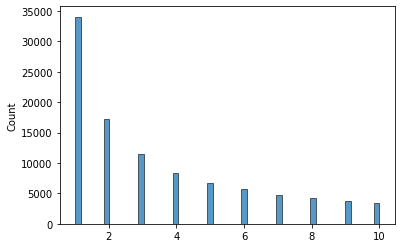

In [17]:
import seaborn as sns
commands = zipf(10,100000,1)
sns.histplot(commands)

100000


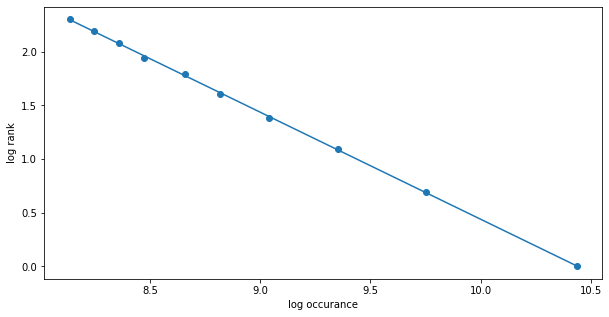

In [19]:
#Testing if we have a zipf law, I don't know how right is this 
#To be discussed
import numpy as np

i = pd.Series(commands)
print(len(i))
temp = i.value_counts().to_dict()
count_dict = {}
for rank,i in enumerate(temp.keys()):
    count_dict[rank + 1] = temp[i]
ranks = np.array(list(count_dict.keys()))
occurances = np.array(list(count_dict.values()))
plt.figure(figsize = (10,5))
plt.scatter(   np.log(occurances), np.log(ranks))
from sklearn.linear_model import LinearRegression
plt.xlabel("log occurance")
plt.ylabel("log rank")
model = LinearRegression().fit(np.log(occurances).reshape(-1,1),np.log(ranks))
plt.plot(np.log(occurances),model.predict(np.log(occurances).reshape(-1,1)))
plt.savefig("A perfet zipf distribution example.jpg")
plt.show()


In [16]:
#Augmenting the linux data


#Either simulate a markov chain extracted from the linux data (a moving markov)
#Use an LSTM to predict the next command for each user and use that to generate data

In [17]:
#Markov Method

In [20]:
import numpy as np
import pandas as pd
command_sequence = [np.random.randint(10) for i in range(500000)]

def transition_matrix(command_sequence) :
    counts = pd.Series(command_sequence).value_counts().to_dict()
    dim = len(set(command_sequence))
    Matrix = np.zeros((dim,dim))
    for e,actual in enumerate(command_sequence[1:]) :
        prev = command_sequence[e-1]
        Matrix[prev,actual] += 1
    for i in range(dim) : 
        Matrix[i] = Matrix[i] / counts[i]
    return Matrix

In [21]:
def generate_from_matrix(matrix,size) : 
    dim = matrix.shape[0]
    mapper = np.eye(dim)
    for i in range(dim) :
        for j in range(dim) :
            mapper[i,j] = (i<=j)
    mapper = matrix @ mapper
    
    for i in range(dim) :
        mapper[i,-1] = 1
    prev = np.random.randint(dim)
    sequence = [prev]
    for i in range(size-1) :
        temp = np.random.uniform()
        actual = np.sum(temp > mapper[prev])
        prev = actual
        sequence.append(prev)
    return sequence

In [22]:
def augment(sequence,number = 100, len_sample = 100) :
    sequence, rev = map_to_ints(sequence)
    new_sequence = []
    for i in range(0,len(sequence) - len_sample,len_sample) : 
        real_sequence = sequence[i:i+len_sample]
        matrix = transition_matrix(sequence)
        new_sequence = new_sequence + real_sequence + generate_from_matrix(matrix,number)
    new_sequence = list(pd.Series(new_sequence).map(rev))
    return new_sequence

In [23]:
command_sequence = [np.random.randint(10) for i in range(5000)]
augmented = augment(command_sequence)

In [24]:
command_sequence = COMMAND_SEQUENCES[0]

In [25]:
len(command_sequence)

8407

In [26]:
augmented = augment(command_sequence) 

In [27]:
len(command_sequence) , len(augmented)

(8407, 16800)

In [28]:
temp = COMMAND_SEQUENCES[1][:10000]
temp , _ = map_to_ints(temp)

In [29]:
transition = transition_matrix(temp)

In [31]:
transition.shape

(154, 154)

In [33]:
(transition == 0).flatten().sum() / (154*154)

0.9529009951087873

In [37]:
transition[3]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])